<a href="https://colab.research.google.com/github/Gilade98/Machine_Learning_Projects/blob/main/The_DS_Toolbox/Ex1_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package.

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY



# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f database.sqlite -p ./datasets/us-baby-name/database.sqlite
!chdir ./datasets/us-baby-name/database.sqlite/
!unzip ./datasets/us-baby-name/database.sqlite/*.zip  -d ./datasets/us-baby-name/database.sqlite

Dataset URL: https://www.kaggle.com/datasets/kaggle/us-baby-names
License(s): CC0-1.0
 92% 121M/131M [00:01<00:00, 81.6MB/s]
100% 131M/131M [00:02<00:00, 68.3MB/s]
/bin/bash: line 1: chdir: command not found
Archive:  ./datasets/us-baby-name/database.sqlite/database.sqlite.zip
  inflating: ./datasets/us-baby-name/database.sqlite/database.sqlite  


In [ ]:
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

DB_PATH = './datasets/us-baby-name/database.sqlite'

conn = sqlite3.connect(f'{DB_PATH}/database.sqlite') # connecting to the database
cursor = conn.cursor() # creating a cursor object

cursor.execute('''
    CREATE TABLE Names (
        State TEXT,
        Gender TEXT,
        Name TEXT,
        Count INTEGER,
        Year INTEGER
    );
''')


batch_size = 1000
offset = 0
while True:
    # Select a batch of rows from the source table
    cursor.execute(f'''
        SELECT State, Gender, Name, Count, Year
        FROM StateNames
        LIMIT {batch_size} OFFSET {offset}
    ''')
    rows = cursor.fetchall()

    # If no rows are returned, stop the loop
    if not rows:
        break

    # Batch insert into 'Names' table
    cursor.executemany('''
        INSERT INTO Names (State, Gender, Name, Count, Year)
        VALUES (?, ?, ?, ?, ?)
    ''', rows)

    # Increase the offset for the next batch
    offset += batch_size

# Commit the transaction and close the connection
conn.commit()


cursor.close() # close the cursor
conn.close()

[('F', 'Mary', 7065, 1880), ('F', 'Anna', 2604, 1880), ('F', 'Emma', 2003, 1880), ('F', 'Elizabeth', 1939, 1880), ('F', 'Minnie', 1746, 1880)]


**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [ ]:
import timeit

conn = sqlite3.connect(f'{DB_PATH}/database.sqlite') # connecting to the database
cursor = conn.cursor() # creating a cursor object

def get_stats():
    cursor.execute('''
        SELECT *
        FROM Names
        WHERE Name = 'Mary'
    ''')
    return cursor.fetchall()

time = timeit.timeit(
    get_stats,
    number=1
)

# print(get_stats())
cursor.close() # close the cursor
conn.close()

print(f"Time: {time} seconds")

Time: 0.6617255670000759 seconds


In [ ]:
conn = sqlite3.connect(f'{DB_PATH}/database.sqlite') # connecting to the database
cursor = conn.cursor() # creating a cursor object

cursor.execute('''
    CREATE INDEX IF NOT EXISTS NameIndex ON Names (Name);
''')

time = timeit.timeit(
    get_stats,
    number=1
)

# print(get_stats())
cursor.close() # close the cursor
conn.close()

print(f"Time: {time} seconds")




Time: 0.02423148200000469 seconds


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **Question = <YOUR_ID> mod 4 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = ""
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 1


***Question 1:*** Write a function that returns how many *female and* male babies were born in a given state in a given year.
Use it to calculate the number of babies born in CA in 1985 (10pt)

In [ ]:
conn = sqlite3.connect(f'{DB_PATH}/database.sqlite') # connecting to the database
cursor = conn.cursor() # creating a cursor object
def get_stats(state, year):
  cursor.execute('''
      SELECT Gender, SUM(Count)
      FROM Names
      WHERE State = ? AND Year = ?
      GROUP BY Gender
  ''', (state, year))
  return cursor.fetchall()

print(get_stats("CA", 1985))
cursor.close() # close the cursor
conn.close()

[('F', 202120), ('M', 223209)]


***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1850 and 1950  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Texas in 2000 (10pt)

**Question 4:** Write a function that returns how many male babies named _William_ where born in a given state in a given year. Use it to find the state in which the highest number of babies _William_ where born in 1950 (10pt)

**Question (for everyone):** For the state of WA write code that calculates the fourth most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [ ]:
conn = sqlite3.connect(f'{DB_PATH}/database.sqlite') # connecting to the database
cursor = conn.cursor() # creating a cursor object
cursor.execute('''CREATE INDEX IF NOT EXISTS idx_state_gender_name_year ON Names (State, Gender, Name, Year)''')
def k_most_popular(state, gender, k):
    cursor.execute(
                  """
                  WITH RankedNames AS (
                    SELECT
                      Gender,
                      (Year / 10) * 10 AS decade,
                      Name,
                      SUM(count) AS total_count,
                      ROW_NUMBER() OVER (PARTITION BY gender, (year / 10) * 10 ORDER BY SUM(count) DESC) AS rank
                    FROM names
                    WHERE state = ? AND Gender = ?
                    GROUP BY gender, decade, name
                  )
                  SELECT gender, decade, name, total_count
                  FROM RankedNames
                  WHERE rank = ?
                  ORDER BY decade;
                  """
    , (state, gender, k))
    return cursor.fetchall()

state = 'WA'
k = 4  # 4th most popular name

male_results = k_most_popular(state, "M" , k )
female_results = k_most_popular(state, "F" , k )
print(male_results)
print(female_results)
cursor.close() # close the cursor
conn.close()

[('M', 1910, 'James', 2024), ('M', 1920, 'Donald', 3822), ('M', 1930, 'John', 4282), ('M', 1940, 'Richard', 8127), ('M', 1950, 'John', 11410), ('M', 1960, 'Robert', 8962), ('M', 1970, 'David', 7114), ('M', 1980, 'Joshua', 8137), ('M', 1990, 'Tyler', 6072), ('M', 2000, 'Daniel', 3996), ('M', 2010, 'Ethan', 1759)]
[('F', 1910, 'Margaret', 2399), ('F', 1920, 'Margaret', 2550), ('F', 1930, 'Shirley', 2826), ('F', 1940, 'Patricia', 5639), ('F', 1950, 'Patricia', 5963), ('F', 1960, 'Michelle', 3975), ('F', 1970, 'Heather', 4295), ('F', 1980, 'Sarah', 6380), ('F', 1990, 'Sarah', 4574), ('F', 2000, 'Madison', 3593), ('F', 2010, 'Isabella', 1635)]


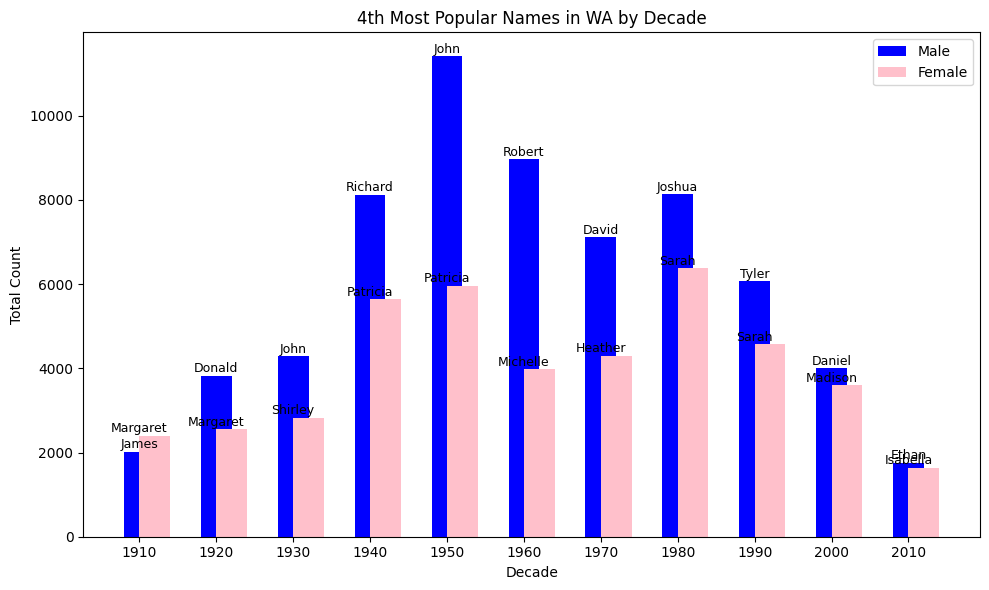

In [ ]:
male_decades = [row[1] for row in male_results]
male_names = [row[2] for row in male_results]
male_counts = [row[3] for row in male_results]

female_decades = [row[1] for row in female_results]
female_names = [row[2] for row in female_results]
female_counts = [row[3] for row in female_results]

plt.figure(figsize=(10, 6))

# Bar chart of the k-th most popular names for males and females
plt.bar(male_decades, male_counts, color='blue', label='Male', width=4, align='center')
plt.bar(female_decades, female_counts, color='pink', label='Female', width=4, align='edge')

# Title and labels
plt.title(f'{k}th Most Popular Names in {state} by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Count')

# Optional: Display name labels on top of bars
for i, count in enumerate(male_counts):
    plt.text(male_decades[i], count + 10, male_names[i], ha='center', va='bottom', fontsize=9)

for i, count in enumerate(female_counts):
    plt.text(female_decades[i], count + 10, female_names[i], ha='center', va='bottom', fontsize=9)

# Show the legend
plt.legend()

# Show the plot
plt.xticks(sorted(set(male_decades + female_decades)))  # Ensure all decades are shown
plt.tight_layout()
plt.show()

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer one of the following questions (according to your ID):

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Peru' (15pt)

In [ ]:
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle


# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s choco_flavors

ref                             title          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------  -------------  ----  -------------------  -------------  ---------  ---------------  
rombikuboktaeder/choco-flavors  choco_flavors  30KB  2018-04-01 04:36:29           2431          6  0.23529412       


In [ ]:
!mkdir -p /content/drive/MyDrive/Datasets

In [ ]:
!kaggle datasets files rombikuboktaeder/choco-flavors

name                   size  creationDate         
--------------------  -----  -------------------  
flavors_of_cacao.csv  125KB  2019-09-29 00:31:19  


In [ ]:
!kaggle datasets download rombikuboktaeder/choco-flavors -f flavors_of_cacao.csv -p /content/drive/MyDrive/Datasets

Dataset URL: https://www.kaggle.com/datasets/rombikuboktaeder/choco-flavors
License(s): CC0-1.0
flavors_of_cacao.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

DB_PATH = '/content/drive/MyDrive/Datasets/'

conn = sqlite3.connect(f'{DB_PATH}/choco_flavors.db') # connecting to the database
cursor = conn.cursor() # creating a cursor object

cursor.execute('''
    CREATE TABLE IF NOT EXISTS choco_flavors (
        Company TEXT,
        SpecificBeanBarName TEXT,
        REF INT,
        ReviewDate INT,
        CocoaPercent TEXT,
        CompanyLocation TEXT,
        Rating REAL,
        BeanType TEXT,
        BroadBeanOrigin TEXT
    )
''')


In [ ]:
import csv
# Load data from CSV file into the table
with open('/content/drive/MyDrive/Datasets/flavors_of_cacao.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        cursor.execute('''
            INSERT INTO choco_flavors (Company, SpecificBeanBarName, REF, ReviewDate, CocoaPercent, CompanyLocation, Rating, BeanType, BroadBeanOrigin)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', row)

# Commit the changes
conn.commit()

In [ ]:
def BroadBeanOrigin(country):
  cursor.execute('''
      SELECT COUNT(*)
      FROM choco_flavors
      WHERE BroadBeanOrigin = ?
  ''', (country,))
  return cursor.fetchone()[0]

country = 'Peru'
print(f"Number of bars with BroadBean Origin in {country} is: {BroadBeanOrigin(country)}")

Number of bars with BroadBean Origin in Peru is: 330


In [ ]:
cursor.close() # close the cursor
conn.close()

**Question 2:** Write a function that returns the maximal and median cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and median cocoa percentage in bars manufactured by Israeli companies (15pt).

ref                             title          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------  -------------  ----  -------------------  -------------  ---------  ---------------  
rombikuboktaeder/choco-flavors  choco_flavors  30KB  2018-04-01 04:36:29           2431          6  0.23529412       


**Question 3:** Calculate the third most common bean type(s) and the most rare bean type(s) (15
pt)

**Question 4:** Calculate the number of reviews and the median rating in each year. Calculate the number of reviews and the median rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
!pip install pony

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download kemical/kickstarter-projects  -p /content/drive/MyDrive/Datasets
!unzip /content/drive/MyDrive/Datasets/kickstarter-projects.zip -d /content/drive/MyDrive/Datasets/kickstarter-projects/

Dataset URL: https://www.kaggle.com/datasets/kemical/kickstarter-projects
License(s): CC-BY-NC-SA-4.0
kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/drive/MyDrive/Datasets/kickstarter-projects.zip
  inflating: /content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201612.csv  
  inflating: /content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201801.csv  


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = ""
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 1


**Question 1:** On average which project category received the highest number of backers? (15 pt)

In [ ]:
!ls /content/drive/MyDrive/Datasets/kickstarter-projects/

ks-projects-201612.csv	ks-projects-201801.csv


In [ ]:
import pandas as pd # we will talk more about pandas in our next lecture
df = pd.read_csv('/content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201612.csv', encoding='ISO-8859-1')
print(df.columns)

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')


<ipython-input-48-f8b665a9d482>:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201612.csv', encoding='ISO-8859-1')


In [ ]:
from typing_extensions import Required
from pony.orm import Database, Required, Set, select, avg
db = Database()
db.bind(provider='sqlite',
        filename='/content/drive/MyDrive/Datasets/kickstarter-projects/kickstarter.pony.db',
        create_db=True) # notice we can easily use other type of databases instead of SQLite

# Each class will be map to a table
class Project(db.Entity):
    name = Required(str)
    category = Required(str)
    backers = Required(int)

db.generate_mapping(create_tables=True)

df = pd.read_csv('/content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201612.csv', encoding='ISO-8859-1')
df['backers '] = pd.to_numeric(df['backers '], errors='coerce').fillna(0).astype(int) #fix backers

for idx, row in df.iterrows():
    name = str(row['name '])  # Ensure 'name' is a string
    category = str(row['category '])  # Ensure 'category' is a string
    backers = int(row['backers '])  # Ensure 'backers' is an integer
    Project(name=name, category=category, backers=backers)

category_averages = select((p.category, avg(p.backers)) for p in Project)

max_category = max(category_averages, key=lambda x: x[1])

print(f"The category with the highest average number of backers is '{max_category[0]}' with {max_category[1]} average backers.")

<ipython-input-65-8ad12d79e692>:16: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201612.csv', encoding='ISO-8859-1')


The category with the highest average number of backers is 'Create Jobs' with 88619.0 average backers.


**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

In [ ]:
!chmod 600 /root/.config/kaggle/kaggle.json
!kaggle datasets list -s "The Academy Awards, 1927-2015"

ref                          title                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------  -----------------------------  -----  -------------------  -------------  ---------  ---------------  
theacademy/academy-awards    The Academy Awards, 1927-2015  185KB  2017-02-13 17:30:48           8226         93  0.7352941        
sagnikpatra/oscars-19272015  Oscar's (1927-2015)            185KB  2020-08-12 13:04:39            228         13  0.8235294        


In [ ]:
!kaggle datasets download theacademy/academy-awards  -p /content/drive/MyDrive/Datasets
!unzip /content/drive/MyDrive/Datasets/academy-awards.zip -d /content/drive/MyDrive/Datasets/academy-awards/

Dataset URL: https://www.kaggle.com/datasets/theacademy/academy-awards
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 9.65MB/s]
Archive:  /content/drive/MyDrive/Datasets/academy-awards.zip
  inflating: /content/drive/MyDrive/Datasets/academy-awards/database.csv  


In [ ]:
import pandas as pd
import sqlite3

# Load the CSV file (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Datasets/academy-awards/database.csv')

# Connect to SQLite (creates a new database if it doesn't exist)
conn = sqlite3.connect('oscars.db')

# Write the DataFrame to a SQLite table
df.to_sql('oscars_table', conn, if_exists='replace', index=False)

cursor = conn.cursor()

cursor.execute("""
SELECT name, COUNT(film) AS nomination_count
FROM oscars_table
WHERE Award = 'Actor'
GROUP BY name
ORDER BY nomination_count DESC
LIMIT 1;
""")

result = cursor.fetchone()
print("Male actor with the most nominations:", result[0], "with", result[1], "nominations")

# Close the connection
conn.close()

Male actor with the most nominations: Spencer Tracy with 9 nominations


**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5.  Cool Bonus: LLMs & Stable Difussion (10pt)

Using GPT-2 (or any other LLM model), create a simple code that generates a bedtime story with 10-page of related images.

In [ ]:
import openai
import os

# Set your OpenAI API key
openai.api_key = 'your_openai_api_key_here'

# Define the story
story = [
    "Once upon a time, in a magical forest, there was a little fox named Fluff.",
    "Fluff loved exploring and one day, he came across a beautiful, sparkling stream.",
    "As Fluff played near the stream, he met a wise old owl perched on a tree.",
    "The owl told Fluff about a hidden treasure deep in the forest, guarded by a dragon.",
    "Fluff, being brave, decided to go on an adventure to find the treasure.",
    "He walked through the dark woods, feeling the cool breeze rustling the leaves.",
    "Suddenly, Fluff heard a growl! A big, green dragon appeared in front of him.",
    "But the dragon wasn't mean; he was lonely and just wanted a friend.",
    "Fluff and the dragon became best friends and decided to find the treasure together.",
    "In the end, they found the treasure, but the real treasure was their friendship."
]

# Function to generate images using DALL·E
def generate_image(prompt, page_number):
    try:
        response = openai.Image.create(
            prompt=prompt,
            n=1,
            size="1024x1024"
        )
        image_url = response['data'][0]['url']
        download_image(image_url, page_number)
    except Exception as e:
        print(f"Error generating image for page {page_number}: {e}")

# Function to download the image
def download_image(url, page_number):
    image_data = requests.get(url).content
    with open(f"bedtime_story_page_{page_number}.png", 'wb') as f:
        f.write(image_data)

# Create the story with images
def create_bedtime_story():
    for i, text in enumerate(story):
        print(f"Generating Page {i+1}...")
        prompt = f"Illustration of {text}"
        generate_image(prompt, i+1)
        print(f"Page {i+1} completed.")

if __name__ == "__main__":
    create_bedtime_story()


Generating Page 1...
Error generating image for page 1: 

You tried to access openai.Image, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Page 1 completed.
Generating Page 2...
Error generating image for page 2: 

You tried to access openai.Image, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://git